In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sub_funcs import *
from slmsuite.hardware.cameras.alliedvision import AlliedVision

AlliedVision serials:
"0441G"
Looking for cameras... success
vimba sn 0441G initializing... success
Image shape: (3036, 4024)
Exposure time: 8000.0 us
Beam coordinates: (2050, 2499)
Max intensity: 14


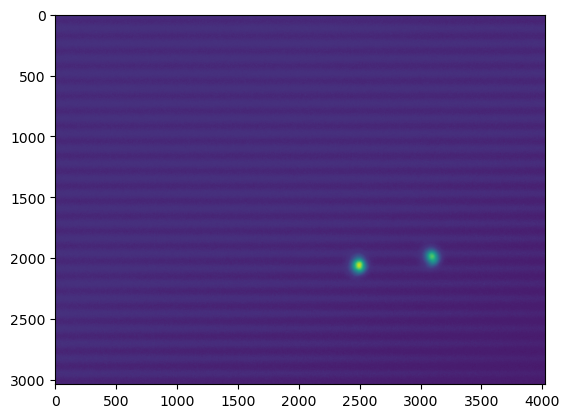

In [13]:
AlliedVision.info(verbose=True)
cam = AlliedVision(serial="0441G", verbose=True)

t_exp_s = 8e-3
cam.set_exposure(t_exp_s)

# ROI = [1035,100,1443,100]                                           #ROI = [x, width, y, height]

im = cam.get_image()
# imc = crop(im, ROI)

plt.imshow(im)

print('Image shape:', cam.default_shape)
print('Exposure time:', np.round(t_exp_s*1e6,0),'us')
print('Beam coordinates:', np.unravel_index(np.argmax(im, axis=None), im.shape))
print('Max intensity:', np.max(im))

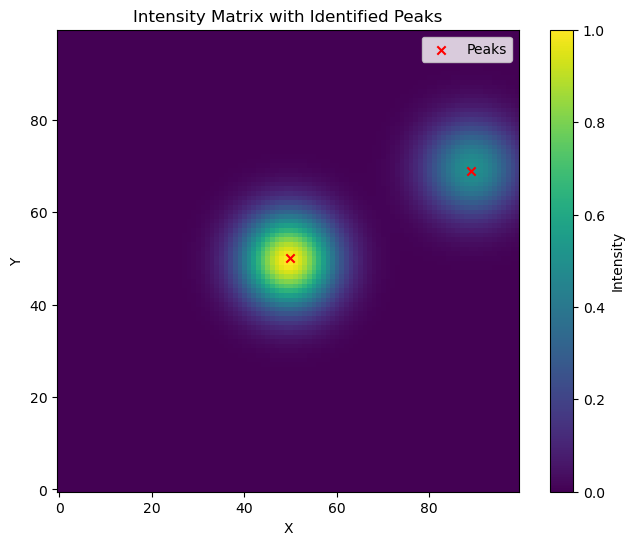

[array([49.50001056, 49.500008  ,  1.99999756,  7.00037664,  7.00036726]), array([69.        , 89.        ,  0.99898022,  1.        ,  1.        ])]


/home/qianlong/codes/slmsuite/sub_funcs.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian_2d, (y_roi.flatten(), x_roi.flatten()), z_roi.flatten(), p0=initial_guess)


In [12]:
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
intensity_matrix = 2*np.exp(-x**2 - y**2) + 1*np.exp(-(x-4)**2 - (y-2)**2)


peaks = peak_detection(intensity_matrix, threshold_abs= 0)
y_coords, x_coords = zip(*peaks)

# Plot the intensity matrix with identified peaks
plt.figure(figsize=(8, 6))
plt.imshow(intensity_matrix, cmap='viridis', origin='lower')
plt.scatter(x_coords,y_coords, color='red', marker='x', label='Peaks')
plt.colorbar(label='Intensity')
plt.title('Intensity Matrix with Identified Peaks')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# test optimization 
param = fit_gaussian_2d(intensity_matrix=intensity_matrix, peaks_coords=peaks, ROI_radius=10)
print(param)

/home/qianlong/codes/slmsuite/sub_funcs.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian_2d, (y_roi.flatten(), x_roi.flatten()), z_roi.flatten(), p0=initial_guess)


The peaks y,x coordinates are [[2050 2499]
 [1984 3095]]


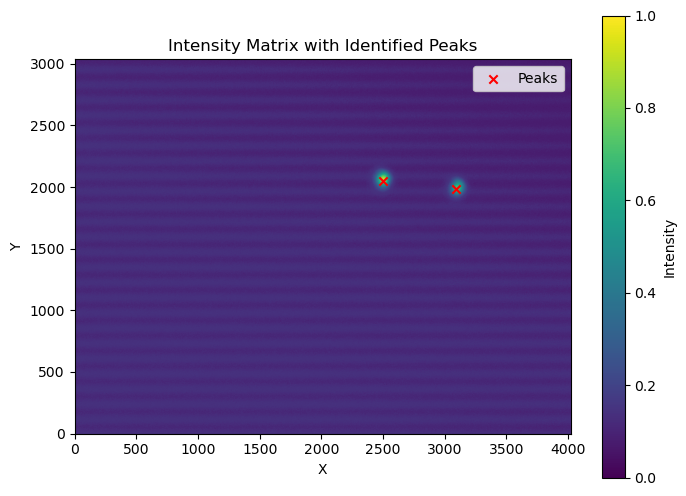

In [14]:
# Generate example intensity matrix with two Gaussian spots
# Replace this with your actual intensity matrix
# x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
# intensity_matrix = 2*np.exp(-x**2 - y**2) + 1*np.exp(-(x-2)**2 - (y-2)**2)

intensity_matrix = im

peaks = peak_detection(intensity_matrix, min_distance= 500, threshold_abs= 0)
y_coords, x_coords = zip(*peaks)
gaussian_params = fit_gaussian_2d(intensity_matrix, peaks_coords=peaks, ROI_radius=250)
write_gaussian_params_to_file(gaussian_params = gaussian_params, peaks=peaks, filename='matching_test.txt')

print("The peaks y,x coordinates are {}".format(peaks))
# Plot the intensity matrix with identified peaks
plt.figure(figsize=(8, 6))
plt.imshow(intensity_matrix, cmap='viridis', origin='lower')
plt.scatter(x_coords,y_coords, color='red', marker='x', label='Peaks')
plt.colorbar(label='Intensity')
plt.title('Intensity Matrix with Identified Peaks')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [8]:
while(True):
    intensity_matrix = cam.get_image()
    peaks = peak_detection(intensity_matrix, min_distance= 500, threshold_abs= 0)
    gaussian_params = fit_gaussian_2d(intensity_matrix, peaks_coords=peaks, ROI_radius=250)
    write_gaussian_params_to_file(gaussian_params = gaussian_params, peaks=peaks, filename='gaussian_params_expo_3e-3.txt')
    time.sleep(180)


/home/qianlong/codes/slmsuite/sub_funcs.py:71: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian_2d, (y_roi.flatten(), x_roi.flatten()), z_roi.flatten(), p0=initial_guess)


KeyboardInterrupt: 